In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
import seaborn as sns

In [31]:
df = pd.read_csv("../proc_data/ethylene_CO_reduced.csv")
X = df.drop('Conc_CO', axis=1)
X = X.drop('Conc_Eth',axis=1)
X = X.drop('Time',axis=1)
y = df['Conc_CO']
print(df.head())

   Unnamed: 0   feature1   feature2    feature3  Time  Conc_CO  Conc_Eth
0           0  95.491605  59.587419  146.399875  0.00      0.0       0.0
1           1  93.642659  58.152907  144.379185  0.01      0.0       0.0
2           2  91.838238  56.456950  142.555734  0.01      0.0       0.0
3           3  90.017108  54.859652  140.602529  0.03      0.0       0.0
4           4  88.485368  53.385325  139.152025  0.04      0.0       0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
def train(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared (R2) Score:", r2)
    residuals = y_test - y_pred
    filtered_residuals = residuals[residuals < 2]
    filtered_residuals = filtered_residuals[filtered_residuals > -2] 
    mean_residual = np.mean(residuals)
    variance_residual = np.var(residuals)
    print(f"Mean of Residuals: {mean_residual}")
    print(f"Variance of Residuals: {variance_residual}")
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].hist(filtered_residuals, bins=20, edgecolor='black')
    axs[0].set_title('Histogram of Filtered Residuals')
    axs[0].set_xlabel('Residual Value')
    axs[0].set_ylabel('Frequency')

    residuals.plot.kde(ax=axs[1])
    axs[1].set_title('Kernel Density Estimation of Residuals')
    axs[1].set_xlabel('Residual Value')
    axs[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

### Linear Regression

Mean Squared Error: 14172.81765815717
R-squared (R2) Score: 0.45165675393569227
Mean of Residuals: 0.04142245615873641
Variance of Residuals: 14172.815942337296


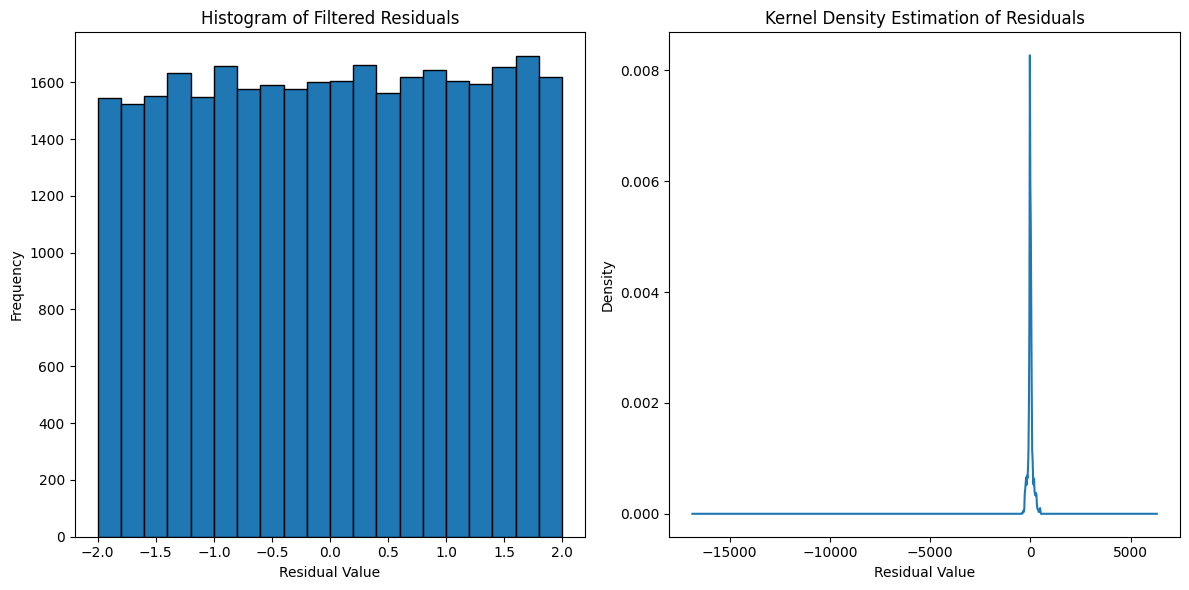

In [34]:
linear_model = LinearRegression()
train(linear_model)

### LASSO Regression

Mean Squared Error: 14169.483426618044
R-squared (R2) Score: 0.45178575463191184
Mean of Residuals: 0.04211290006478927
Variance of Residuals: 14169.481653121695


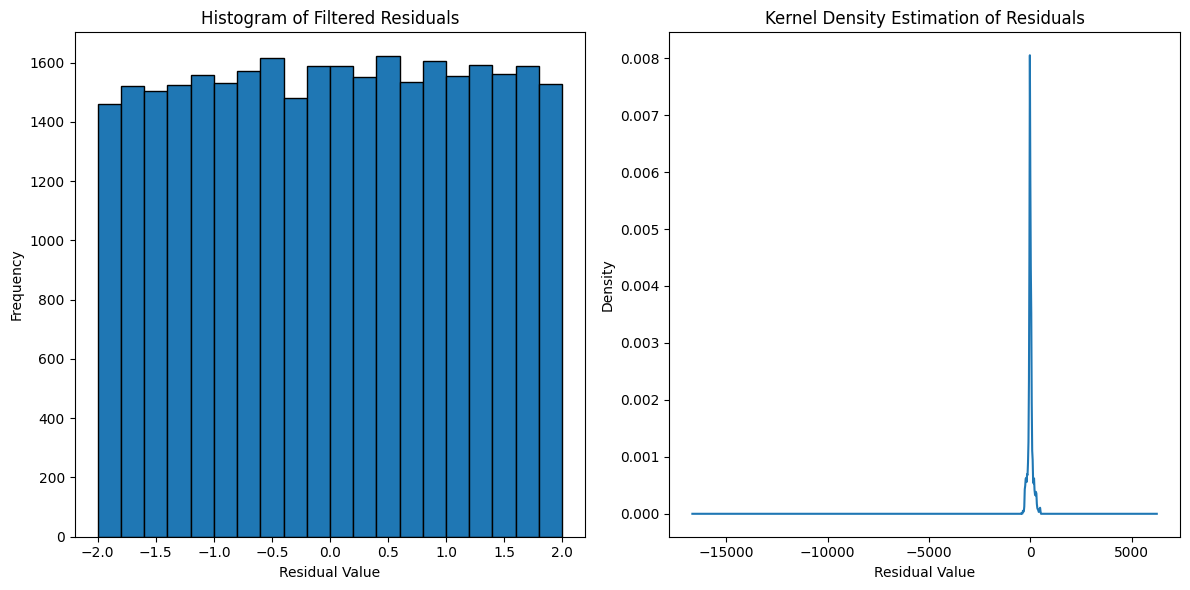

In [35]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
train(lasso_model)

### Ridge Regression

Mean Squared Error: 14172.817584588674
R-squared (R2) Score: 0.45165675678204154
Mean of Residuals: 0.04142246535306659
Variance of Residuals: 14172.815868768039


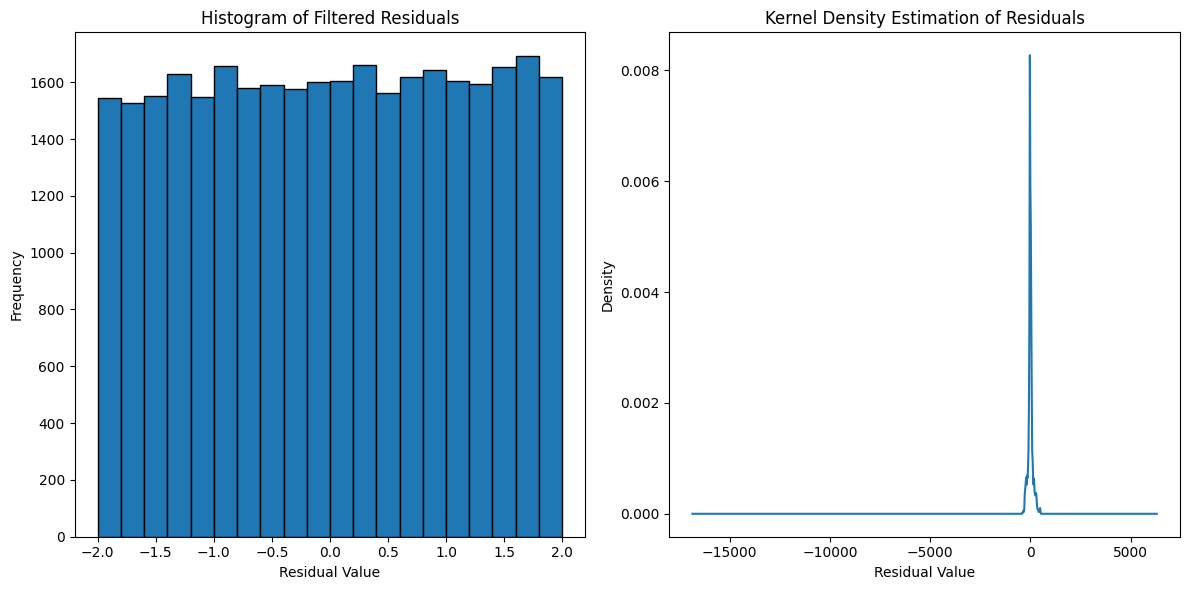

In [36]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
train(ridge_model)

### Decision Tree Regression

Mean Squared Error: 48.1573848127818
R-squared (R2) Score: 0.998136801210096
Mean of Residuals: 0.007450384418246717
Variance of Residuals: 48.15732930455381


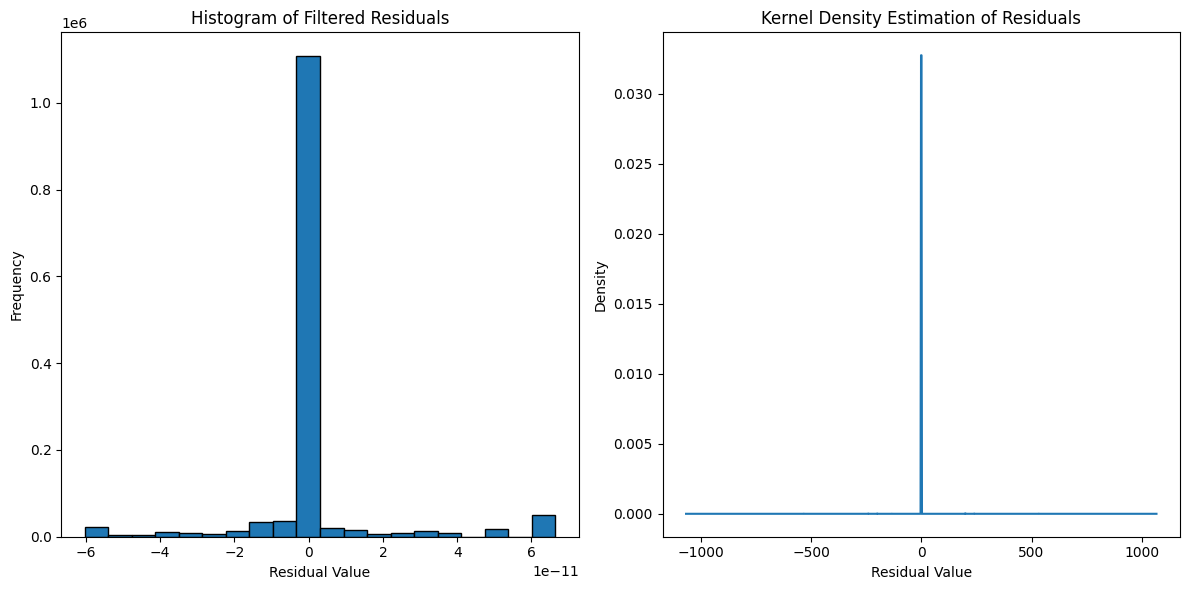

In [37]:
from sklearn import tree

decision_tree_model = tree.DecisionTreeRegressor()
train(decision_tree_model)

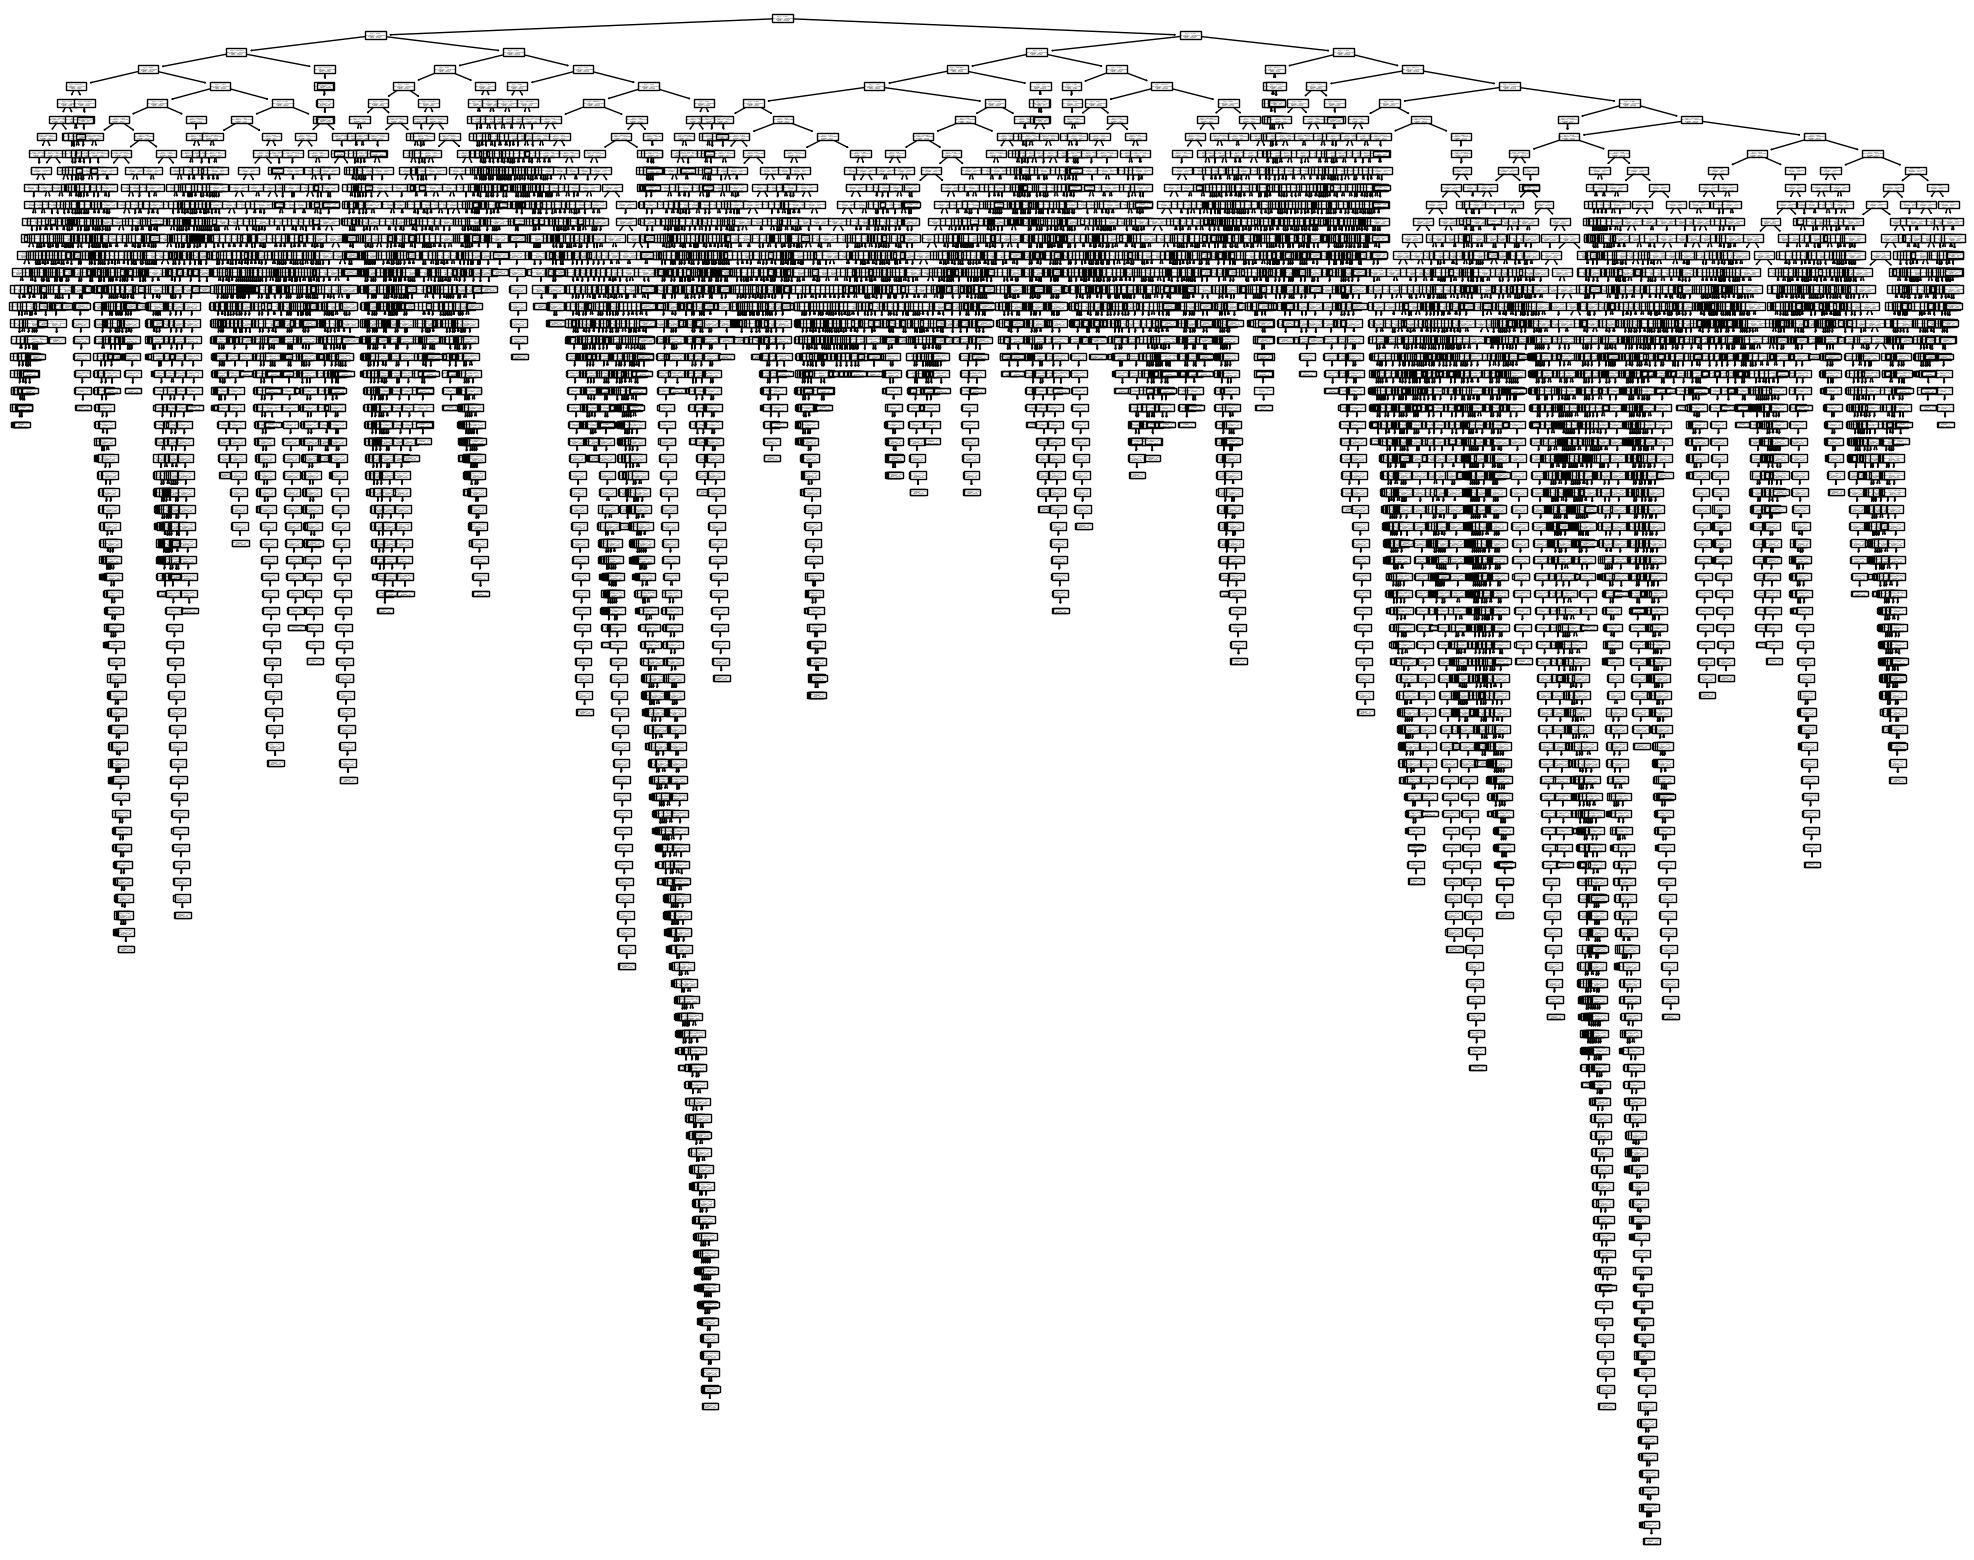

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_model)

In [39]:
depth = decision_tree_model.get_depth()
n_leaves = decision_tree_model.get_n_leaves()

print(f'The depth of the tree is {depth}')
print(f'The number of leaves is {n_leaves}')

The depth of the tree is 90
The number of leaves is 6761


### Polynomial Regression

Mean Squared Error: 13737.251724331472
R-squared (R2) Score: 0.4685087055934173
Mean of Residuals: 0.15368494170461652
Variance of Residuals: 13737.22810527017


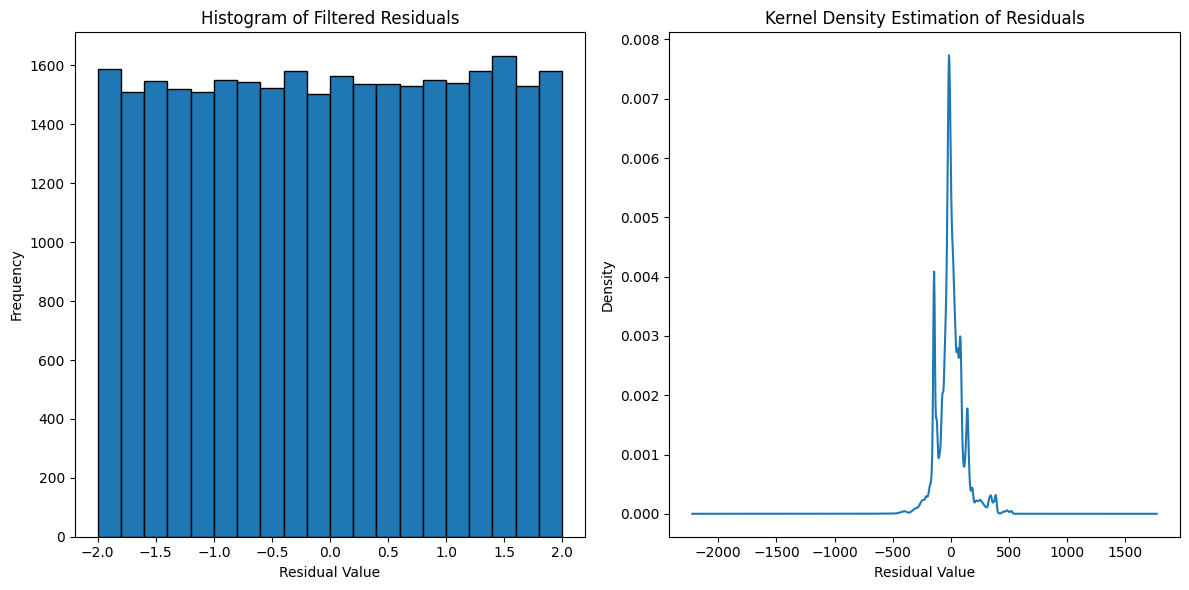

In [40]:
from sklearn.preprocessing import PolynomialFeatures

degree = 4  # You can change this to the desired polynomial degree
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
train(poly_model, X_train=X_train_poly, X_test=X_test_poly)